In [1]:
from skimage import filters
import cv2
import numpy as np
import matplotlib.pyplot as plt

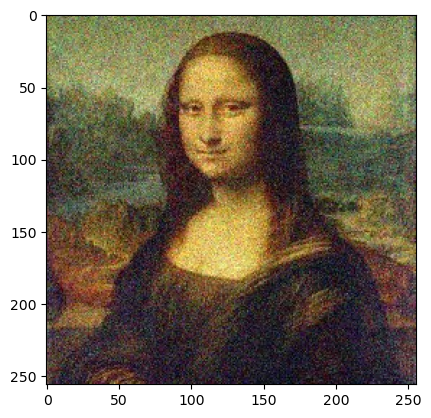

In [3]:
img = cv2.imread('./image/monalisa_noisy.jpg',1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

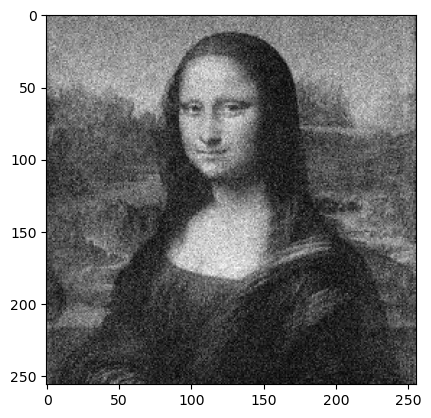

In [17]:
imgYCC = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
f = imgYCC[:,:,0]
plt.imshow(f,cmap='grey')

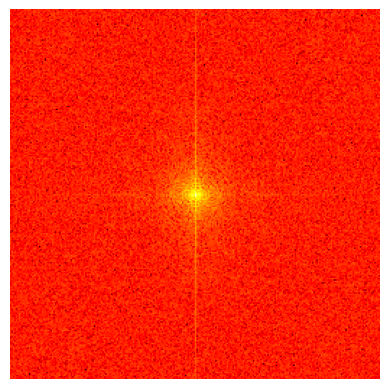

In [18]:
# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)),cmap='hot')
plt.axis('off')
plt.show()

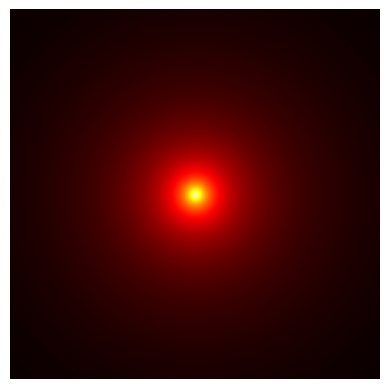

In [25]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 11 # cut of frequency
n = 1 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='hot')
plt.axis('off')
plt.show()

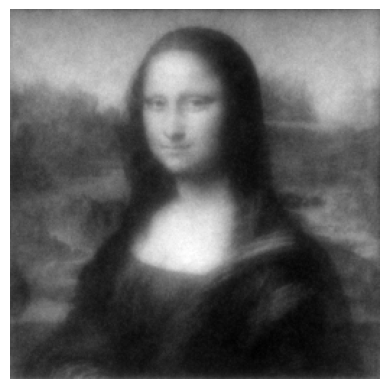

In [26]:
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

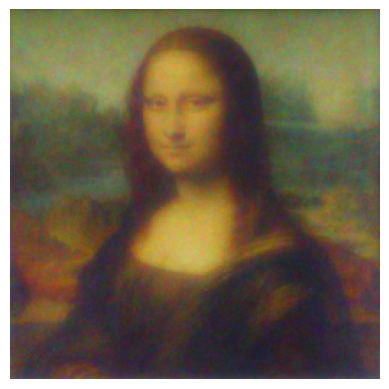

In [27]:
img_ycrb = imgYCC.copy()
img_ycrb[:,:,0] = g
denoised_img = cv2.cvtColor(img_ycrb, cv2.COLOR_YCrCb2RGB)
plt.imshow(denoised_img)
plt.axis(False)
plt.show()

In [31]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_dimage = cv2.normalize(denoised_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

ssim_value = ssim(norm_dimage, norm_image, data_range=norm_image.max() - norm_image.min())
psnr_value = psnr(norm_dimage, norm_image, data_range=norm_image.max() - norm_image.min())

print(f"PSNR: {psnr_value}")
print(f"SSIM: {ssim_value}")